<a href="https://colab.research.google.com/github/BrandonBosire/Week-6-IP/blob/main/WEEK6_IP_(BRANDON_MORENO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mchezopesa Ltd - Football analysis and prediction company

### 1. Defining the Question

#### a) Specifying the Question
Predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training)

#### b) Defining the Metric for Success

Creating models that meet the statistical criteria for both accuracy and dependability 

#### c) Understanding the context 

A new FIFA/Coca-Cola World Ranking model took effect in August 2018 after approval by the FIFA Council.

This new version developed by FIFA was named "SUM" as it relies on adding/subtracting points won or lost for a game to/from the previous point totals rather than averaging game points over a given time period as in the previous version of the World Ranking.

The method of calculation adds/subtracts points (as opposed to averaging points) for individual
matches to/from a team’s existing point total. The points which are added or subtracted are partially
determined by the relative strength of the two opponents, including the logical expectation that teams
higher in the ranking should fare better against teams lower in the ranking.

#### d) Recording the Experimental Design

Below is the expected flow of our work:

- Data Cleaning and Preparation
    - Load libraries and dataset
    - Deal with missing values
    - Deal with duplicated records
    - Perform feature engineering
- Perform EDA
    - Univariate Analysis
    - Bivariate Analysis
- Regression modeling
    - Polynomial modeling (Case 1 and Case 2)
    - Logistical modeling

#### e) Data relevance / Appropriateness of Data


###Here are the variables found from both dataset:

-Rank - Country rank.

-Country Abbreviation

-Total Points

-Previous Points

-Rank Change

-Average Previous Years Points

-Average Previous Years Points Weighted (50%)

-Average 2 Years Ago Points

-Average 2 Years Ago Points Weighted (30%)

-Average 3 Years Ago Points

-Average 3 Years Ago Points Weighted (20%)

-Confederation

-Date - date of the match


-Home_team - the name of the home team

-Away_team - the name of the away team

-Home_score - full-time home team score including extra time, not 
including penalty-shootouts

-Away_score - full-time away team score including extra time, not including penalty-shootouts

-Tournament - the name of the tournament

-City - the name of the city/town/administrative unit where the match was played

-Country - the name of the country where the match was played

-Neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue

In [101]:
#Importing libraries.
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [102]:
#Loading the two data sets
#
#The first one contains the country ranks and country names
ranks = pd.read_csv('fifa_ranking.csv')
#The second one contains the home team and away team country names, as well as scores and tournament types.
score = pd.read_csv('results.csv')


In [103]:
#Previewing the two datasets
#ranks dataset
#
ranks.head(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [104]:
#The scores dataset
#
score.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [105]:
#Previewing the number of rows and columns
#
ranks.shape, score.shape

((57793, 16), (40839, 9))

In [106]:
#Previewing column names
#
print('Ranks dataset columns', ranks.columns)

print('Score dataset columns', score.columns)

Ranks dataset columns Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')
Score dataset columns Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')


In [107]:
#Getting column data information
#Ranks dataset
#
ranks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [108]:
#Getting column data information
#Score dataset
#
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [109]:
#Converting the date columns in both datasets to datetime format
#
score['date']=pd.to_datetime(score['date'])

ranks['rank_date']=pd.to_datetime(ranks['rank_date'])

In [110]:
ranks

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [111]:
#Creating new variables for the desired columns.
#From ranks dataset we will only use three columns
#The country_full,rank and rank_date(rank_date as well as country_full to be changed to date for join purposes)
#
rank_df=ranks[['country_full','rank','rank_date']]
rank_df['date']=rank_df['rank_date']
rank_df['home_team']=rank_df['country_full']
rank_df['away_team']=rank_df['country_full']
rank_df.drop(['rank_date'],axis=1,inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [112]:
rank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   country_full  57793 non-null  object        
 1   rank          57793 non-null  int64         
 2   date          57793 non-null  datetime64[ns]
 3   home_team     57793 non-null  object        
 4   away_team     57793 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.2+ MB


In [113]:
#From the score dataset we will be using 
#The date , home_team , away_team , home_score , away_score and tournament columns
#
score_df= score[['date','home_team', 'away_team', 'home_score' , 'away_score', 'tournament']]
score_df.head(4)


,date,home_team,away_team,home_score,away_score,tournament
0,1872-11-30,Scotland,England,0,0,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly


In [114]:
score_df['date']=pd.to_datetime(score_df['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [115]:
#We will only use the score_df for dates that accur after 1993-08-08
#As this is where the rank_df's rank_date column starts
#
score_df
score_df.head(1)

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11-30,Scotland,England,0,0,Friendly


In [116]:
#Checking and dropping duplicates
#The ranks dataset
rank_df.duplicated().sum()
#Found 38
rank_df.drop_duplicates(inplace=True)

#The score dataset
score_df.duplicated().sum()
#Found 1
score_df.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [117]:
#The rank_df dataset but with the country_full column renamed as away_team(for merging purposes) 
x=rank_df.drop(['home_team'],axis=1)
x

,country_full,rank,date,away_team
0,Germany,1,1993-08-08,Germany
1,Italy,2,1993-08-08,Italy
2,Switzerland,3,1993-08-08,Switzerland
3,Sweden,4,1993-08-08,Sweden
4,Argentina,5,1993-08-08,Argentina
...,...,...,...,...
57788,Anguilla,206,2018-06-07,Anguilla
57789,Bahamas,206,2018-06-07,Bahamas
57790,Eritrea,206,2018-06-07,Eritrea
57791,Somalia,206,2018-06-07,Somalia


In [118]:
rank_df

,country_full,rank,date,home_team,away_team
0,Germany,1,1993-08-08,Germany,Germany
1,Italy,2,1993-08-08,Italy,Italy
2,Switzerland,3,1993-08-08,Switzerland,Switzerland
3,Sweden,4,1993-08-08,Sweden,Sweden
4,Argentina,5,1993-08-08,Argentina,Argentina
...,...,...,...,...,...
57788,Anguilla,206,2018-06-07,Anguilla,Anguilla
57789,Bahamas,206,2018-06-07,Bahamas,Bahamas
57790,Eritrea,206,2018-06-07,Eritrea,Eritrea
57791,Somalia,206,2018-06-07,Somalia,Somalia


In [119]:
#First merger :the rank_df and the score_df datasets
merged=score_df.merge(rank_df,how='inner',on=['date','home_team'])
merged


,date,home_team,away_team_x,home_score,away_score,tournament,country_full,rank,away_team_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,59,Bolivia
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,8,Brazil
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,35,Ecuador
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Guinea,65,Guinea
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,67,Paraguay
...,...,...,...,...,...,...,...,...,...
952,2018-06-07,England,Costa Rica,2,0,Friendly,England,12,England
953,2018-06-07,Uruguay,Uzbekistan,3,0,Friendly,Uruguay,14,Uruguay
954,2018-06-07,Portugal,Algeria,3,0,Friendly,Portugal,4,Portugal
955,2018-06-07,Iceland,Ghana,2,2,Friendly,Iceland,22,Iceland


In [120]:
#Renaming columns of the first merger and performing third merger(merged dataset and the x dataset )
merged.drop(['away_team_y'],axis=1,inplace=True)
merged.rename(columns={'away_team_x':'away_team'},inplace=True)
merged
merged_df= merged.merge(x,how='inner', on=['date','away_team'])
merged_df

,date,home_team,away_team,home_score,away_score,tournament,country_full_x,rank_x,country_full_y,rank_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,59,Uruguay,22
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,8,Mexico,14
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,35,Venezuela,94
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Guinea,65,Sierra Leone,86
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,67,Argentina,5
...,...,...,...,...,...,...,...,...,...,...
866,2018-06-07,England,Costa Rica,2,0,Friendly,England,12,Costa Rica,23
867,2018-06-07,Uruguay,Uzbekistan,3,0,Friendly,Uruguay,14,Uzbekistan,95
868,2018-06-07,Portugal,Algeria,3,0,Friendly,Portugal,4,Algeria,66
869,2018-06-07,Iceland,Ghana,2,2,Friendly,Iceland,22,Ghana,47


In [121]:
#Renaming columns
merged_df.rename(columns={'rank_x':'home_rank','rank_y':'away_rank'},inplace=True)
merged_df

,date,home_team,away_team,home_score,away_score,tournament,country_full_x,home_rank,country_full_y,away_rank
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,Bolivia,59,Uruguay,22
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,8,Mexico,14
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Ecuador,35,Venezuela,94
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Guinea,65,Sierra Leone,86
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,67,Argentina,5
...,...,...,...,...,...,...,...,...,...,...
866,2018-06-07,England,Costa Rica,2,0,Friendly,England,12,Costa Rica,23
867,2018-06-07,Uruguay,Uzbekistan,3,0,Friendly,Uruguay,14,Uzbekistan,95
868,2018-06-07,Portugal,Algeria,3,0,Friendly,Portugal,4,Algeria,66
869,2018-06-07,Iceland,Ghana,2,2,Friendly,Iceland,22,Ghana,47


In [122]:
def status(row):
  for i in merged_df.iterrows():
    if (row['home_score'] > row['away_score']):
      return  str('Win')
    elif (row['home_score'] < row['away_score']):
      return  str('Loss')
    else:
      return str('Draw')

merged_df['Status']=merged_df.apply(status,axis=1) 


In [123]:
#Creating a numerical column that indicates (1 : if tournament is a Friendly, and 2: if not a Friendly)
def typ(row):
  for i in merged_df.iterrows():
    if row['tournament']== 'Friendly':
      return  int(1)
    else :
      return  int(0)

merged_df['Tournament_type']=merged_df.apply(typ,axis=1) 

In [124]:
#Dropping unnecessary columns
merged_df.drop(['country_full_y','country_full_x'],axis=1,inplace=True)
merged_df

,date,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank,Status,Tournament_type
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,22,Win,0
1,1993-08-08,Brazil,Mexico,1,1,Friendly,8,14,Draw,1
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,35,94,Win,0
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,65,86,Win,1
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,67,5,Loss,0
...,...,...,...,...,...,...,...,...,...,...
866,2018-06-07,England,Costa Rica,2,0,Friendly,12,23,Win,1
867,2018-06-07,Uruguay,Uzbekistan,3,0,Friendly,14,95,Win,1
868,2018-06-07,Portugal,Algeria,3,0,Friendly,4,66,Win,1
869,2018-06-07,Iceland,Ghana,2,2,Friendly,22,47,Draw,1


In [125]:
#Checking for null values.
merged_df.isnull().sum()

date               0
home_team          0
away_team          0
home_score         0
away_score         0
tournament         0
home_rank          0
away_rank          0
Status             0
Tournament_type    0
dtype: int64

##Univariate analysis

In [126]:
#Checking descriptive summaries of all numerical columns.
merged_df.describe()

,home_score,away_score,home_rank,away_rank,Tournament_type
count,871.000000,871.000000,871.000000,871.000000,871.000000
mean,1.632606,1.004592,65.549943,69.918485,0.659013
std,1.905960,1.154691,47.557993,50.497652,0.474313
min,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,27.000000,28.000000,0.000000
50%,1.000000,1.000000,58.000000,61.000000,1.000000
75%,2.000000,2.000000,95.000000,102.500000,1.000000
max,31.000000,9.000000,206.000000,209.000000,1.000000


In [127]:
import seaborn as sns

In [128]:
sns.histplot

<function seaborn.distributions.histplot>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

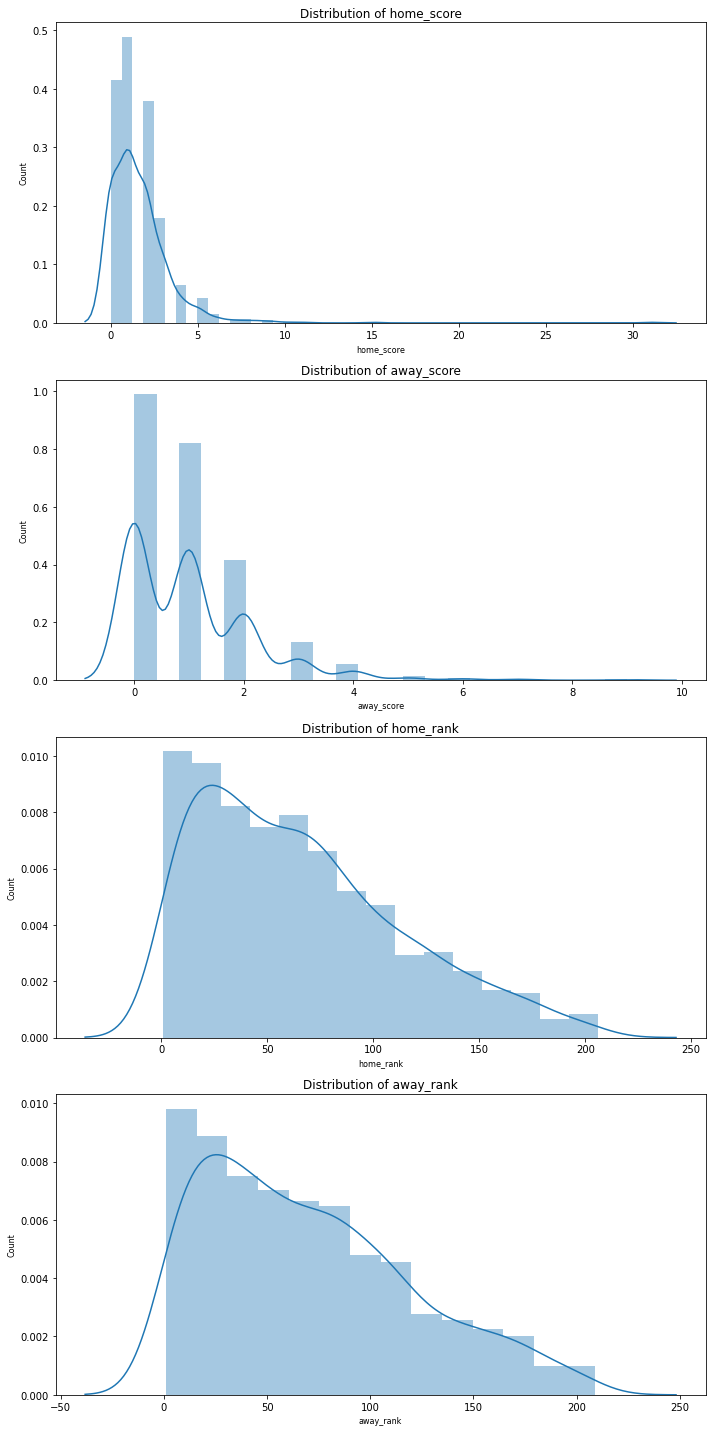

In [129]:
#Plotting histogram for all numerical columns.
#
coln=merged_df.select_dtypes('number')
colms=coln.columns.drop(['Tournament_type'],1)
colms

fig, ax = plt.subplots(len(colms), figsize=(10,20))

for i, col in enumerate(colms):

    sns.distplot(merged_df[col], hist=True, ax=ax[i])
    ax[i].set_title('Distribution of '+col)
    ax[i].set_xlabel(col, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show()



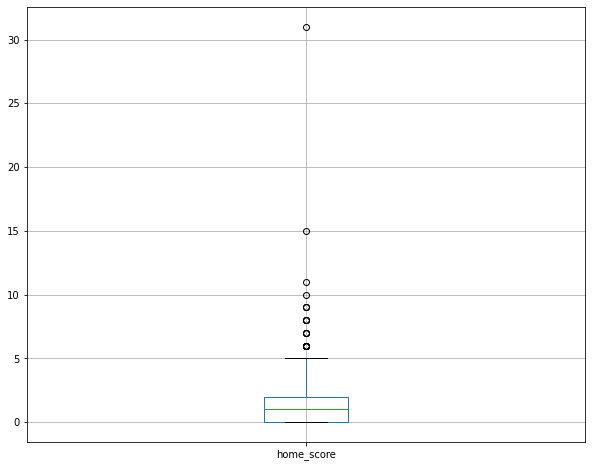

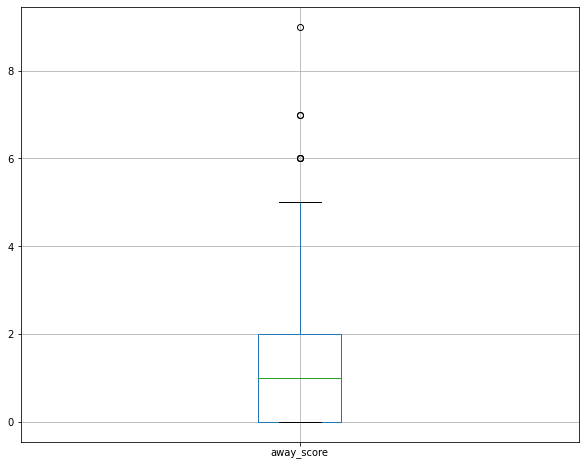

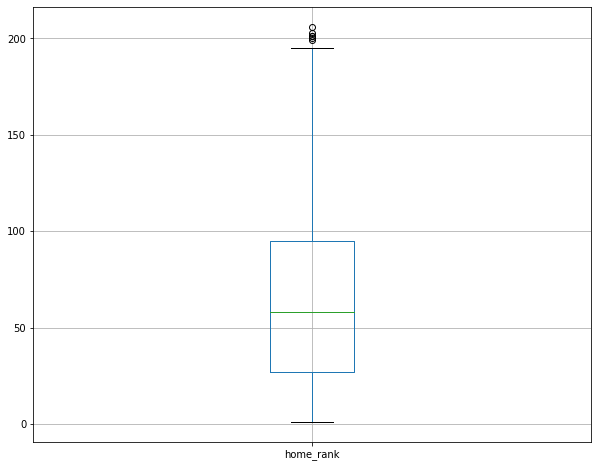

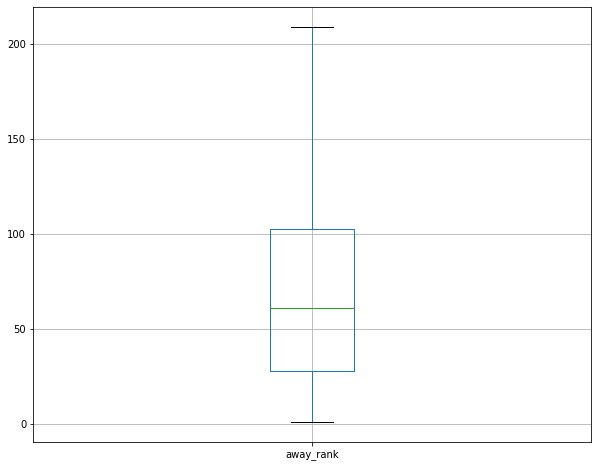

In [130]:
#Boxplots for all numerical columns.
for col in colms:
  plt.figure(figsize = (10, 8))
  merged_df.boxplot([col])

In [131]:
#Assessing outliers in home_rank column.
#
merged_df[merged_df['home_rank']>200]

,date,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank,Status,Tournament_type
408,2004-05-12,American Samoa,Vanuatu,1,9,FIFA World Cup qualification,203,161,Loss,0
630,2009-02-11,San Marino,Northern Ireland,0,3,FIFA World Cup qualification,201,49,Loss,0
640,2009-03-11,Guam,Mongolia,1,0,EAFF Championship,201,193,Win,0
812,2012-09-05,Montserrat,Suriname,1,7,CFU Caribbean Cup qualification,206,138,Loss,0


#####From the above we can see that the rank outliers are just countries with low ranks(corresponding to higher rank values)

####Bivariate analysis

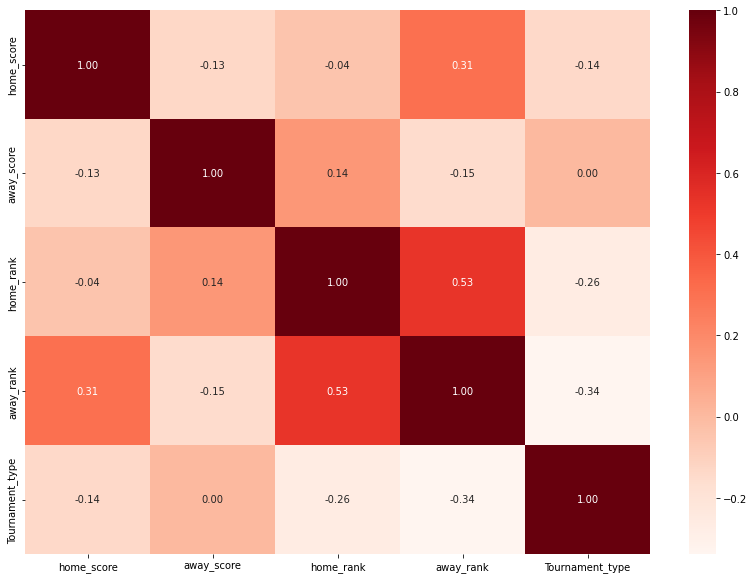

In [132]:
#Plotting a heat map to show numerical variable correlations
plt.figure(figsize=(14,10))
sns.heatmap(merged_df.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()

####From the above heatmap we can determine:
-There are moderate negative correlations between home_rank ,away_rank and tournament_type(-0.26 and -0.34 respectively)

-There is a moderate positive correlation between away_rank and  home_score(+0.31) 

-There is a relatively strong positive correlation between home_rank and away_rank (+0.53)

In [133]:

#What to train given:

#Rank of home team
#Rank of away team
#Tournament type
#Away team score
#Model 1: Predict how many goals the home team scores.

#Model 2: Predict how many goals the away team scores.

In [134]:
#Importing libraries
#
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [135]:
#checking for multicollinearity for independent variables . 
X = merged_df[['home_rank','away_rank','Tournament_type', 'away_score','home_score']]
correlations =X.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_rank,away_rank,Tournament_type,away_score,home_score
home_rank,1.623230,-0.977892,0.143115,-0.334995,0.348216
away_rank,-0.977892,1.836134,0.291429,0.347241,-0.524338
Tournament_type,0.143115,0.291429,1.146431,0.028245,0.077397
away_score,-0.334995,0.347241,0.028245,1.104126,0.028142
home_score,0.348216,-0.524338,0.077397,0.028142,1.191661


The VIF values are nowhere near 5 thus we can use these variables as they don't depend on each other.

###Model 1:Predict how many goals the home team scores.

In [157]:
#Creating the feature(independent) and target(dependent) variables
# X and Y respectively
#
X = merged_df[['home_rank','away_score','away_rank','Tournament_type']].values
y = merged_df['home_score'].values

In [158]:
# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, random_state=15)





In [159]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 3) 
X_poly = poly_reg.fit_transform((X))

lin_reg = LinearRegression()
Lin = lin_reg.fit(X_poly, y)
y_pred= lin_reg.predict(poly_reg.fit_transform(X_test))

In [164]:
#Model 1 Root mean square Error
#Using sklearn's metrics
#
from sklearn import metrics
print("Model 1's root mean square error :",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

Model 1's root mean square error : 1.0751181874234421


In [140]:
#Model 1 residuals test
# 
model = LinearRegression()
model.fit(X_train, y_train)

# This is the predicted value based on our model 
predicts = model.predict(X_test)

#Subtracting actual value from predicted value to determine 
#Residual(Error) 

residuals = np.subtract(predicts, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()
print("Model 1's residual mean:", residuals.mean())

# Heteroskedasticity
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print("Model 1's P-Value:",p_value)

if (test_result > critical_value):
  print('Refine Model')
else:
  print('Keep model!')

Model 1's residual mean: 0.13904962625212008
Model 1's P-Value: 1.742366587123813e-10
Keep model!


###Model 2: Predict how many goals the away team scores.

In [141]:
#Creating the feature(independent) and target(dependent) variables
# X and Y respectively
#
X = merged_df[['home_rank','home_score','away_rank','Tournament_type']]
y = merged_df['away_score']

In [142]:
#Spliting into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15)

#Transforming data into a polynomial 
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X)

lin_reg = LinearRegression()
Lin = lin_reg.fit(X_poly, y)
y_pred= lin_reg.predict(poly_reg.fit_transform(X_test))

In [143]:
#Model 2 Root mean square Error
#Using sklearn's metrics
#
from sklearn import metrics
print("Root mean square error :",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

Root mean square error : 1.0574241415131391


In [144]:
#Model 2 residuals ,heteroskedasticity and accuracy test
# 
model = LinearRegression()
model.fit(X_train, y_train)

# This is the predicted value based on our model 
predicts = model.predict(X_test)

#Subtracting actual value from predicted value to determine 
#Residual(Error) 

residuals = np.subtract(predicts, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()
print("Model 2's residual mean:", residuals.mean())

# Heteroskedasticity
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print("Model 2's P-Test:",p_value)

if (test_result > critical_value):
  print('Refine Model')
else:
  print('Keep model!')


Model 2's residual mean: -0.003901875186558453
Model 2's P-Test: 8.746289223908651e-23
Keep model!


##Logistics Regression:

###Question:

-Figure out from the home team’s perspective if the game is a Win, Lose or Draw .

In [147]:
#Converting status column to numeric 
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
merged_df['Status'] = en.fit_transform(merged_df['Status'])
merged_df

##2 : Win
##1 : Loss
##0 : Draw

,date,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank,Status,Tournament_type
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,22,2,0
1,1993-08-08,Brazil,Mexico,1,1,Friendly,8,14,0,1
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,35,94,2,0
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,65,86,2,1
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,67,5,1,0
...,...,...,...,...,...,...,...,...,...,...
866,2018-06-07,England,Costa Rica,2,0,Friendly,12,23,2,1
867,2018-06-07,Uruguay,Uzbekistan,3,0,Friendly,14,95,2,1
868,2018-06-07,Portugal,Algeria,3,0,Friendly,4,66,2,1
869,2018-06-07,Iceland,Ghana,2,2,Friendly,22,47,0,1


In [150]:
#Creating the test and train through splitting
#First creating the dependent and independent variables:
#

X = merged_df[['home_rank','home_score','away_rank','away_score','Tournament_type']]
y = merged_df[['Status']]

#Spliting the variables
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=15)

In [153]:
#Creatinginstances of the log model
#

from sklearn.linear_model import LogisticRegression

logmod = LogisticRegression()
log = logmod.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [154]:
#Creating a prediction variable using our model 
y_pred = log.predict(X_test)

#Determining  model accurcy 
from sklearn.metrics import accuracy_score
score = accuracy_score
print("Model Accuracy :",log.score(X_test,y_test)*100)

Model Accuracy : 100.0


###From the above we can confidently conclude that both our polynomial models and our logistical models were highly effective and dependable.